# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Govind | Patel | Govind Patel,03/10/2024 | Hours | Contribution |
| Member 2: | Hiren | Hirani | Hiren Hirani,03/10/2024 | Hours | Contribution |
| Member 3: | Krishna | Patel | Krishna Patel,03/10/2024 | Hours | Contribution |
| Member 4: | Pintu | Jat | Pintu Jat,03/10/2024 | Hours | Contribution |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

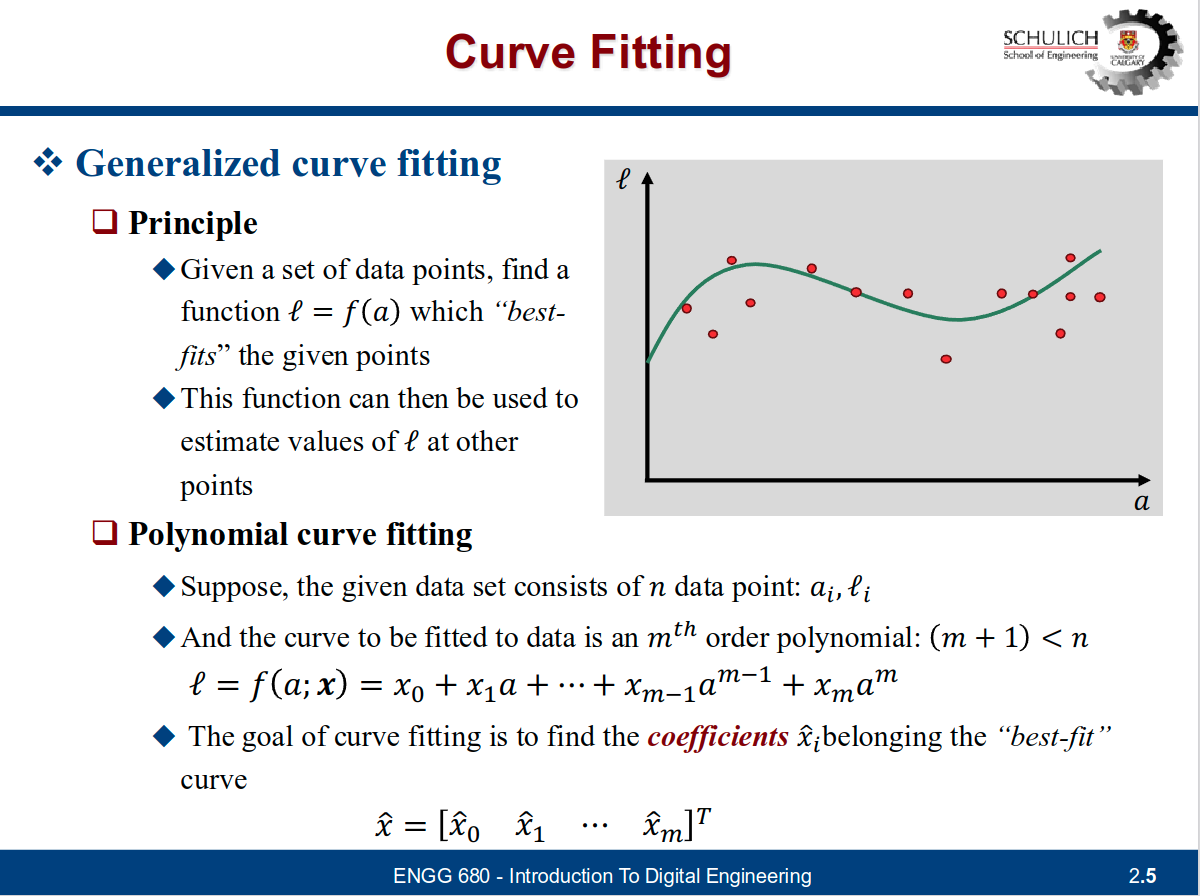

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [5]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/LabAssignment2/data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df_data['l'].to_numpy()
l_var = df_data['l_var'].to_numpy()
l_true = df_data['l_true'].to_numpy()

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


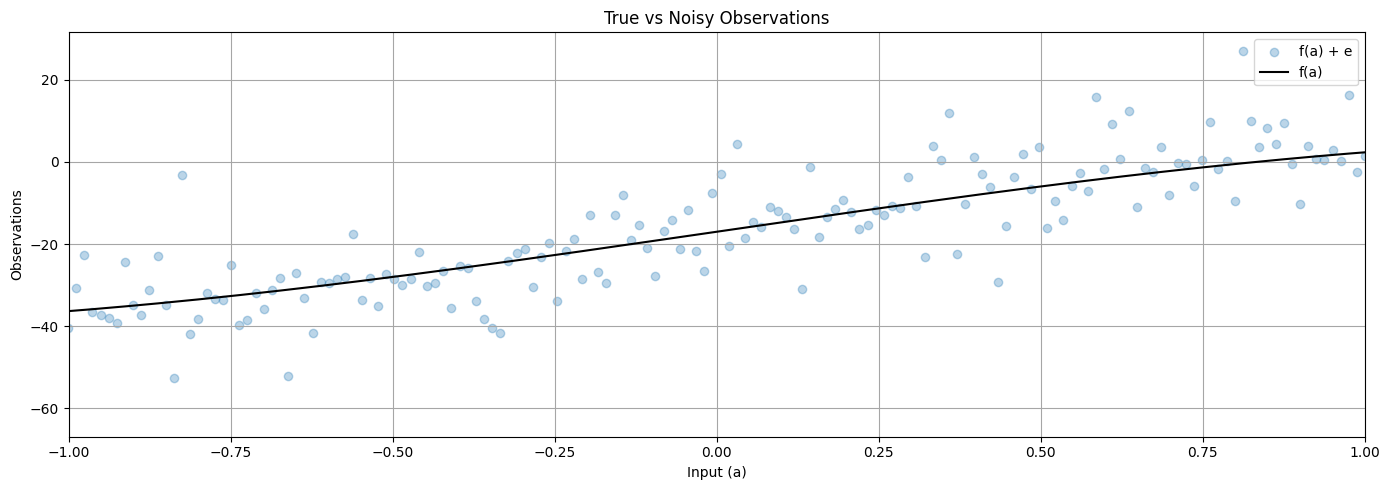

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Scatter plot for noisy observations
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Line plot for true observations
ax.plot(a, l_true, label="f(a)", color='k')

# Set axis labels
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')

# Set title
ax.set_title('True vs Noisy Observations')

# Add legend
ax.legend()

#Set grid
ax.grid(True, which='both',ls='-',color='0.65')

# Scale the range of the x-axis to be -1 to 1
ax.set_xlim([-1, 1])

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

 # Construct the design matrix A using a polynomial of degree 'deg'
    A = np.vander(a, deg + 1, increasing=True)  # Vandermonde matrix

 # Apply the weight matrix P to the design matrix A and the noisy observations l
    A_weighted = P @ A  # Weighted design matrix
    l_weighted = P @ l  # Weighted observations

# Solve for the estimated polynomial coefficients x using the normal equation
# x = (A^T * P * A)^(-1) * (A^T * P * l)
    ATA_inv = np.linalg.inv(A_weighted.T @ A_weighted)  # Inverse of (A^T * P * A)
    x = ATA_inv @ (A_weighted.T @ l_weighted)  # Estimated coefficients

# Compute the observation residuals
    l_est = A @ x  # Estimated observations
    v = l - l_est  # Residuals (observed - estimated)

# Compute the a posteriori variance factor (APV) (goodness of fit)
    apv = (v.T @ P @ v) / (len(l) - (deg + 1))  # APV (variance of residuals normalized by degrees of freedom)

# Calculate the covariance matrix of the estimated coefficients
    cov_x = apv * ATA_inv  # Covariance of estimated coefficients

    return (x, cov_x, apv, v)


In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# For degree 1
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)

# For degree 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)

# For degree 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)

# Print or store results if needed
print(f"Degree 1 Coefficients: {x_deg1}")
print(f"Degree 3 Coefficients: {x_deg3}")
print(f"Degree 5 Coefficients: {x_deg5}")

Degree 1 Coefficients: [-16.59352348   7.25633807]
Degree 3 Coefficients: [-16.72496774  19.63961372   0.03979476  -2.08281013]
Degree 5 Coefficients: [-1.65770980e+01  2.28207004e+01 -1.09433276e-01 -3.58096979e+00
  1.75697706e-02  1.36073672e-01]


In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)
# For degree 1 (linear)
line_uw = np.polyval(x_deg1[::-1], a)

# For degree 3 (cubic)
cubic_uw = np.polyval(x_deg3[::-1], a)

# For degree 5 (quintic)
quintic_uw = np.polyval(x_deg5[::-1], a)

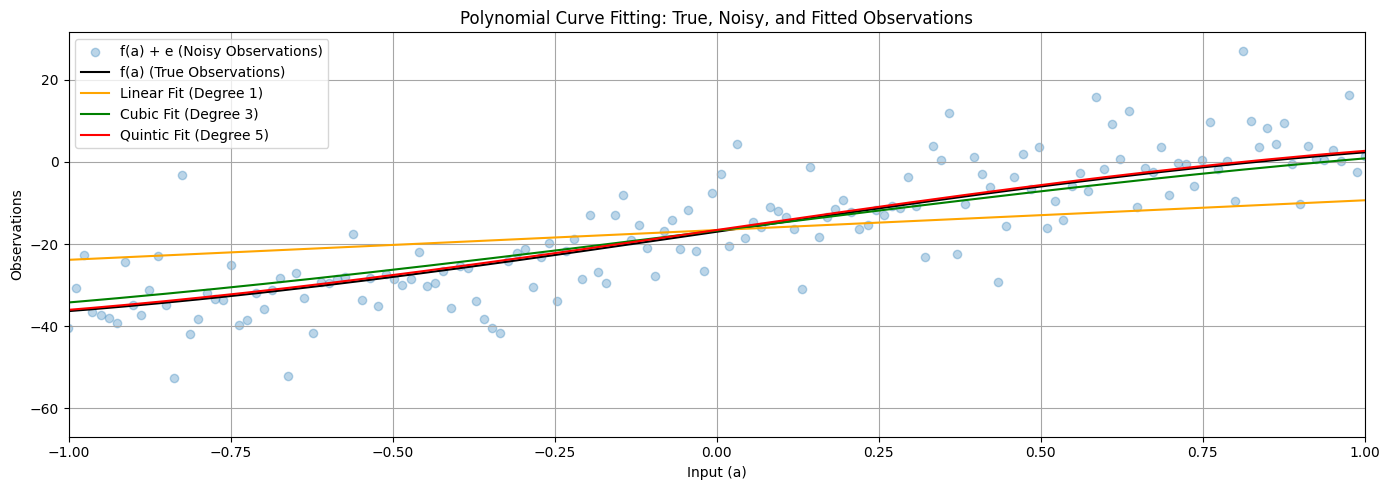

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Scatter plot for noisy observations
ax.scatter(a, l, label="f(a) + e (Noisy Observations)", color='tab:blue', marker='o', alpha=0.3)

# Line plot for true observations
ax.plot(a, l_true, label="f(a) (True Observations)", color='k')

# Plot for linear polynomial (degree 1)
ax.plot(a, line_uw, label="Linear Fit (Degree 1)", color='orange')

# Plot for cubic polynomial (degree 3)
ax.plot(a, cubic_uw, label="Cubic Fit (Degree 3)", color='green')

# Plot for quintic polynomial (degree 5)
ax.plot(a, quintic_uw, label="Quintic Fit (Degree 5)", color='red')

# Set axis labels
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')

# Set title
ax.set_title('Polynomial Curve Fitting: True, Noisy, and Fitted Observations')

# Add legend
ax.legend()

# Set grid
ax.grid(True, which='both', ls='-', color='0.65')

# Scale the range of the x-axis to be -1 to 1
ax.set_xlim([-1, 1])

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

print(f"A posteriori variance factor for Linear Fit (Degree 1): {apv_deg1}")
print(f"A posteriori variance factor for Cubic Fit (Degree 3): {apv_deg3}")
print(f"A posteriori variance factor for Quintic Fit (Degree 5): {apv_deg5}")


A posteriori variance factor for Linear Fit (Degree 1): 162.742608604322
A posteriori variance factor for Cubic Fit (Degree 3): 66.13227783131883
A posteriori variance factor for Quintic Fit (Degree 5): 63.75834463018419


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

norm_linear = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

# Print the results
print(f"Norm between Linear Fit (Degree 1) and True Observations: {norm_linear}")
print(f"Norm between Cubic Fit (Degree 3) and True Observations: {norm_cubic}")
print(f"Norm between Quintic Fit (Degree 5) and True Observations: {norm_quintic}")

Norm between Linear Fit (Degree 1) and True Observations: 229.06016796744095
Norm between Cubic Fit (Degree 3) and True Observations: 38.28597992911667
Norm between Quintic Fit (Degree 5) and True Observations: 17.36996719696516


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

"""
1. A posteriori variance factor:
   - The a posteriori variance factor measures the goodness of fit. A smaller value indicates a better fit.
   - As the polynomial degree increases from 1 to 5, the a posteriori variance factor tends to decrease.
   - It can be understood that the higher-degree polynomials (i.e., cubic and quintic) fit the noisy data better as compared to a linear polynomial.
   - However, a very small a posteriori variance factor for a high-degree polynomial might indicate overfitting, where the model captures the noise rather than the underlying trend.

2. Norm between predicted and true observations:
   - The norm measures the difference between the predicted polynomial values and the true observations. A smaller norm indicates a closer fit.
   - Similar to the a posteriori variance factor, the norm tends to decrease as the polynomial degree increases, showing that higher-degree polynomials fit the true observations more closely.
   - While the quintic polynomial (degree 5) may have the smallest norm, it's important to consider the risk of overfitting with very high-degree polynomials, which can lead to poor generalization to new data.

3. Overall pattern:
   - There is a trade-off between model complexity and fit. The fit to the data can be improved by increasing the fit of the data, but may lead to overfitting.
   - The cubic polynomial (degree 3) may provide a reasonable balance between capturing the underlying trend and avoiding overfitting, based on the values of the a posteriori variance factor and norm.
"""


"\n1. A posteriori variance factor:\n   - The a posteriori variance factor measures the goodness of fit. A smaller value indicates a better fit.\n   - As the polynomial degree increases from 1 to 5, the a posteriori variance factor tends to decrease.\n   - It can be understood that the higher-degree polynomials (i.e., cubic and quintic) fit the noisy data better as compared to a linear polynomial.\n   - However, a very small a posteriori variance factor for a high-degree polynomial might indicate overfitting, where the model captures the noise rather than the underlying trend.\n\n2. Norm between predicted and true observations:\n   - The norm measures the difference between the predicted polynomial values and the true observations. A smaller norm indicates a closer fit.\n   - Similar to the a posteriori variance factor, the norm tends to decrease as the polynomial degree increases, showing that higher-degree polynomials fit the true observations more closely.\n   - While the quintic po

In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)

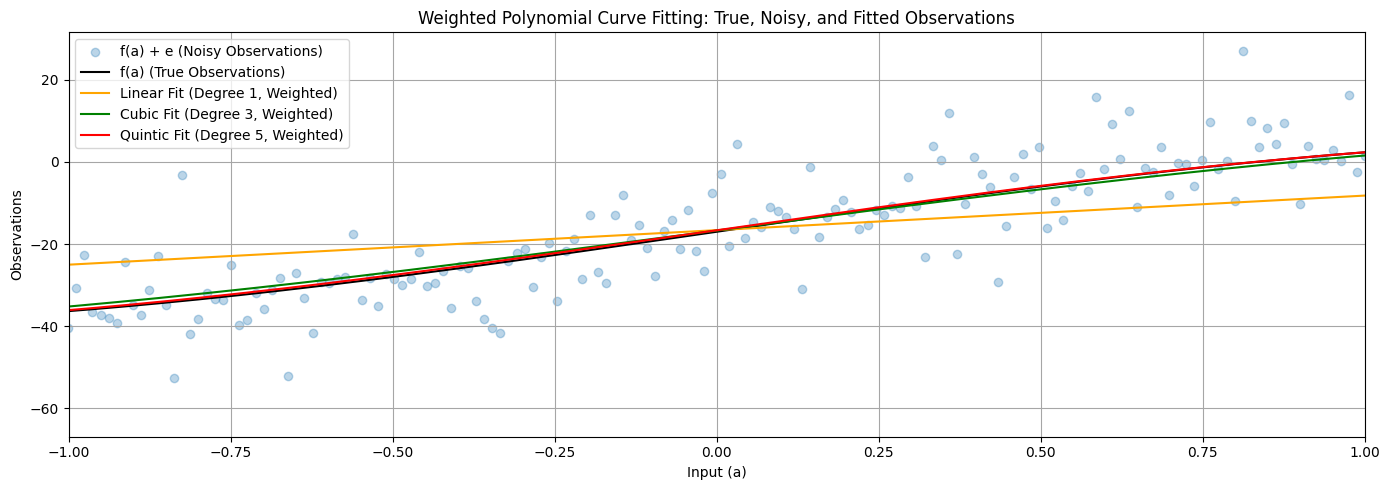

A posteriori variance factor for Linear Fit (Degree 1, Weighted): 12.221680577188417
A posteriori variance factor for Cubic Fit (Degree 3, Weighted): 1.1781919297282089
A posteriori variance factor for Quintic Fit (Degree 5, Weighted): 0.9483792305830182
Norm between Linear Fit (Degree 1, Weighted) and True Observations: 236.37242826749582
Norm between Cubic Fit (Degree 3, Weighted) and True Observations: 40.52123440155848
Norm between Quintic Fit (Degree 5, Weighted) and True Observations: 6.83175967320476


In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# For degree 1
x_deg1_weighted, cov_x_deg1_weighted, apv_deg1_weighted, v_deg1_weighted = fit_polynomial_curve(a, l, P, deg=1)

# For degree 3
x_deg3_weighted, cov_x_deg3_weighted, apv_deg3_weighted, v_deg3_weighted = fit_polynomial_curve(a, l, P, deg=3)

# For degree 5
x_deg5_weighted, cov_x_deg5_weighted, apv_deg5_weighted, v_deg5_weighted = fit_polynomial_curve(a, l, P, deg=5)

# Step 7: Construct polynomial functions for each degree using the weighted estimated coefficients

# For degree 1 (linear)
line_weighted = np.polyval(x_deg1_weighted[::-1], a)

# For degree 3 (cubic)
cubic_weighted = np.polyval(x_deg3_weighted[::-1], a)

# For degree 5 (quintic)
quintic_weighted = np.polyval(x_deg5_weighted[::-1], a)

# Step 8: Plot the results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Scatter plot for noisy observations
ax.scatter(a, l, label="f(a) + e (Noisy Observations)", color='tab:blue', marker='o', alpha=0.3)

# Line plot for true observations
ax.plot(a, l_true, label="f(a) (True Observations)", color='k')

# Plot for linear polynomial (degree 1)
ax.plot(a, line_weighted, label="Linear Fit (Degree 1, Weighted)", color='orange')

# Plot for cubic polynomial (degree 3)
ax.plot(a, cubic_weighted, label="Cubic Fit (Degree 3, Weighted)", color='green')

# Plot for quintic polynomial (degree 5)
ax.plot(a, quintic_weighted, label="Quintic Fit (Degree 5, Weighted)", color='red')

# Set axis labels
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')

# Set title
ax.set_title('Weighted Polynomial Curve Fitting: True, Noisy, and Fitted Observations')

# Add legend
ax.legend()

# Set grid
ax.grid(True, which='both', ls='-', color='0.65')

# Scale the range of the x-axis to be -1 to 1
ax.set_xlim([-1, 1])

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()

# Step 9: Print the a posteriori variance factor for each polynomial function

print(f"A posteriori variance factor for Linear Fit (Degree 1, Weighted): {apv_deg1_weighted}")
print(f"A posteriori variance factor for Cubic Fit (Degree 3, Weighted): {apv_deg3_weighted}")
print(f"A posteriori variance factor for Quintic Fit (Degree 5, Weighted): {apv_deg5_weighted}")

# Step 10: Compute the norm between the predicted observations (weighted) and the true observations

# Calculate the norm for each weighted polynomial fit
norm_linear_weighted = np.linalg.norm(line_weighted - l_true)
norm_cubic_weighted = np.linalg.norm(cubic_weighted - l_true)
norm_quintic_weighted = np.linalg.norm(quintic_weighted - l_true)

# Print the results
print(f"Norm between Linear Fit (Degree 1, Weighted) and True Observations: {norm_linear_weighted}")
print(f"Norm between Cubic Fit (Degree 3, Weighted) and True Observations: {norm_cubic_weighted}")
print(f"Norm between Quintic Fit (Degree 5, Weighted) and True Observations: {norm_quintic_weighted}")



In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

"""
1. A posteriori variance factor:
   - The a posteriori variance factor tends to be smaller for the weighted LSE compared to the unweighted LSE.
   - It indicates that the weighted approach fits the data more effectively by accounting for the varying levels of reliability in the observations.
   - As the weight matrix P incorporates the inverse of the variances, observations with lower variance (more reliable data) are given more importance in the fitting process, improving the goodness of fit.

2. Norm between predicted and true observations:
   - The norm values between the weighted polynomial fits and the true observations are generally smaller than those of the unweighted fits.
   - This suggests that the weighted LSE provides a closer fit to the true observations because it prioritizes the accurate observations over the noisier ones.
   - In the unweighted case, all observations contribute equally to the fit, which allows the noisier data points to distort the results.

3. Explanation of the phenomena:
   - The weighted LSE assigns different weights to each observation based on its variance, allowing the fitting process to be more robust against noise.
   - By giving less weight to observations with higher variance (i.e. noisier data), the model captures the underlying trend in the data in a better way.
   - The improvement in the a posteriori variance factor and norm indicates that incorporating weights based on observation reliability leads to more accurate and meaningful fitting results.
"""

'\n1. A posteriori variance factor:\n   - The a posteriori variance factor tends to be smaller for the weighted LSE compared to the unweighted LSE.\n   - It indicates that the weighted approach fits the data more effectively by accounting for the varying levels of reliability in the observations.\n   - As the weight matrix P incorporates the inverse of the variances, observations with lower variance (more reliable data) are given more importance in the fitting process, improving the goodness of fit.\n\n2. Norm between predicted and true observations:\n   - The norm values between the weighted polynomial fits and the true observations are generally smaller than those of the unweighted fits.\n   - This suggests that the weighted LSE provides a closer fit to the true observations because it prioritizes the accurate observations over the noisier ones.\n   - In the unweighted case, all observations contribute equally to the fit, which allows the noisier data points to distort the results.\n

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

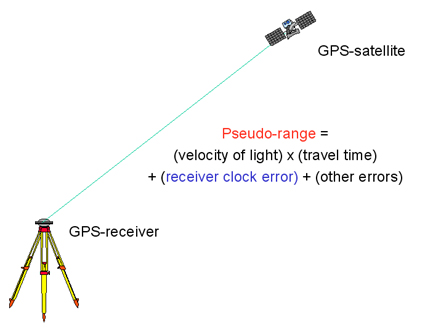

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [8]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/LabAssignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/LabAssignment2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [9]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = sat_pos.shape[1] + 1

In [10]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)

In [11]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [12]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [14]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [15]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
    """
    Computes the geometric distances between satellites and the receiver.

    Args:
        receiver_pos: A numpy array representing the position of the receiver (X, Y, Z).
        satellite_pos: A 2D numpy array where each row represents the position of a satellite (X, Y, Z).

    Returns:
        distance: A numpy array containing the distances between the receiver and each satellite.
    """
    # Calculate the differences in positions
    diff = satellite_pos - receiver_pos  # Broadcasting the receiver_pos across all satellites

    # Compute the Euclidean distance using numpy
    distance = np.linalg.norm(diff, axis=1)  # Calculate the norm along rows

    return distance

In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (#convergence criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = #...

       # compute the design matrix A
       # (1 marks)
       A = #...

       # compute the misclosure array w
       # (1 marks)
       w = #...

       # compute the corrections delta
       # (1 marks)
       delta = #...

       # update the states
       # (1 marks)
       x_hat = #...


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
